In [9]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
from utils_plotting import val_map, display_dict
from utils_scaling import fit, plot_contours_params

import jax.numpy as jnp

In [11]:
# df = pd.read_csv("data/temp.csv")
df_big = pd.read_csv("data/extrapolation.csv")

In [12]:
def get_data(drop_df, key = "train/CrossEntropyLoss"):
    drop_df = drop_df.dropna(subset=[key])

    N = jnp.array(drop_df["params"], dtype=jnp.float32)
    D = jnp.array(drop_df["tokens"], dtype=jnp.float32)
    L = jnp.array(drop_df[key], dtype=jnp.float32)
    return N, D, L


In [13]:
# formats = ["bfloat16", "fp4_e2m1", "float16", "fp16", "fp8_e5m2", "fp8_e4m3", "fp6_e3m2", "fp6_e2m3", "fp4", "int8", "int4"]

formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16"]

w_format = fp6_e2m3, fp6_e2m3
F 0     2.199935e+19
1     2.199994e+19
2     2.199980e+19
3     2.199979e+19
4     2.199965e+19
          ...     
69    1.999800e+17
70    1.999325e+17
71    1.999915e+17
72    1.999662e+17
73    1.999855e+17
Name: F, Length: 74, dtype: float64 0     415051200.0
1     360466560.0
2     311190848.0
3     266929152.0
4     227386560.0
         ...     
69     57950720.0
70     45544128.0
71     35202432.0
72     26630720.0
73     19534080.0
Name: N, Length: 74, dtype: float32
w_format = fp6_e2m3, fp6_e3m2
F 0     9.999083e+18
1     9.999625e+18
2     9.999236e+18
3     9.999886e+18
4     4.573050e+18
5     4.572380e+18
6     4.572998e+18
7     4.572572e+18
8     4.573033e+18
9     4.572933e+18
10    4.572889e+18
11    4.572767e+18
Name: F, dtype: float64 0     777930240.0
1     613607808.0
2     541326912.0
3     475239680.0
4     541326912.0
5     475239680.0
6     415051200.0
7     360466560.0
8     311190848.0
9     266929152.0
10    227386560.0
11    1

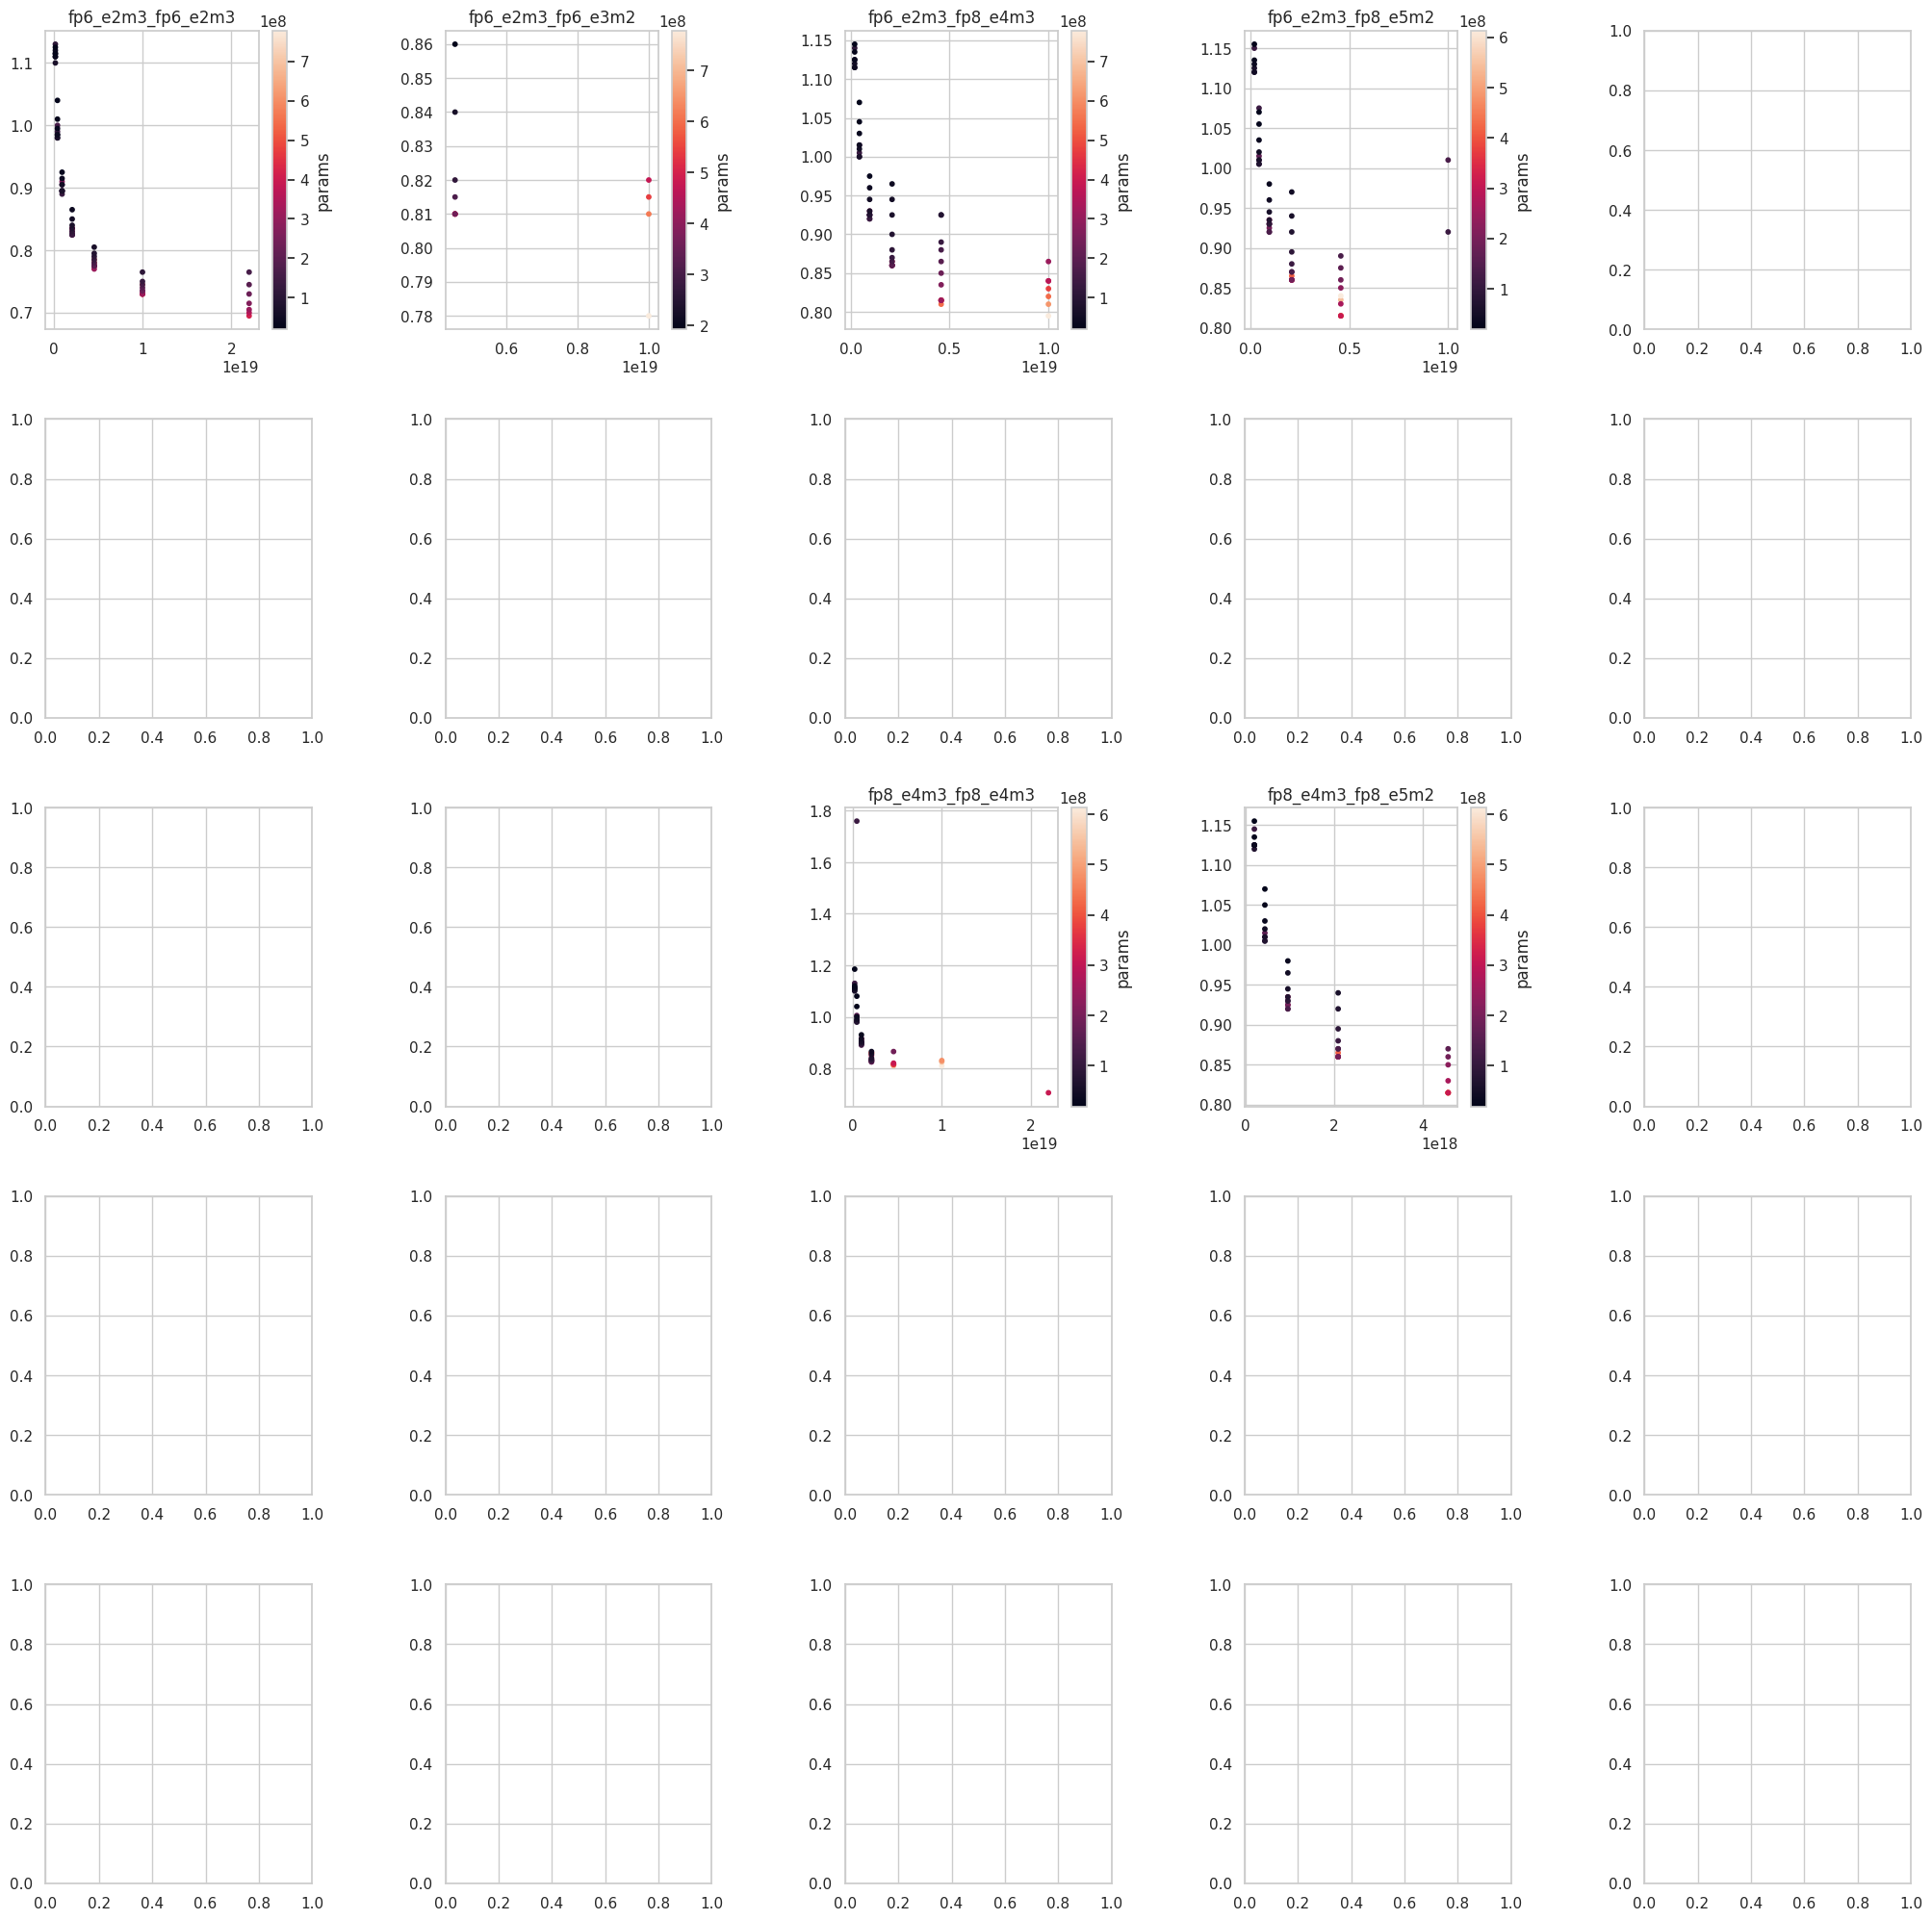

w_format = fp6_e2m3, fp6_e2m3
F 0     2.199935e+19
1     2.199994e+19
2     2.199980e+19
3     2.199979e+19
4     2.199965e+19
          ...     
69    1.999800e+17
70    1.999325e+17
71    1.999915e+17
72    1.999662e+17
73    1.999855e+17
Name: F, Length: 74, dtype: float64 0     415051200.0
1     360466560.0
2     311190848.0
3     266929152.0
4     227386560.0
         ...     
69     57950720.0
70     45544128.0
71     35202432.0
72     26630720.0
73     19534080.0
Name: N, Length: 74, dtype: float32
w_format = fp6_e2m3, fp6_e3m2
F 0     9.999083e+18
1     9.999625e+18
2     9.999236e+18
3     9.999886e+18
4     4.573050e+18
5     4.572380e+18
6     4.572998e+18
7     4.572572e+18
8     4.573033e+18
9     4.572933e+18
10    4.572889e+18
11    4.572767e+18
Name: F, dtype: float64 0     777930240.0
1     613607808.0
2     541326912.0
3     475239680.0
4     541326912.0
5     475239680.0
6     415051200.0
7     360466560.0
8     311190848.0
9     266929152.0
10    227386560.0
11    1

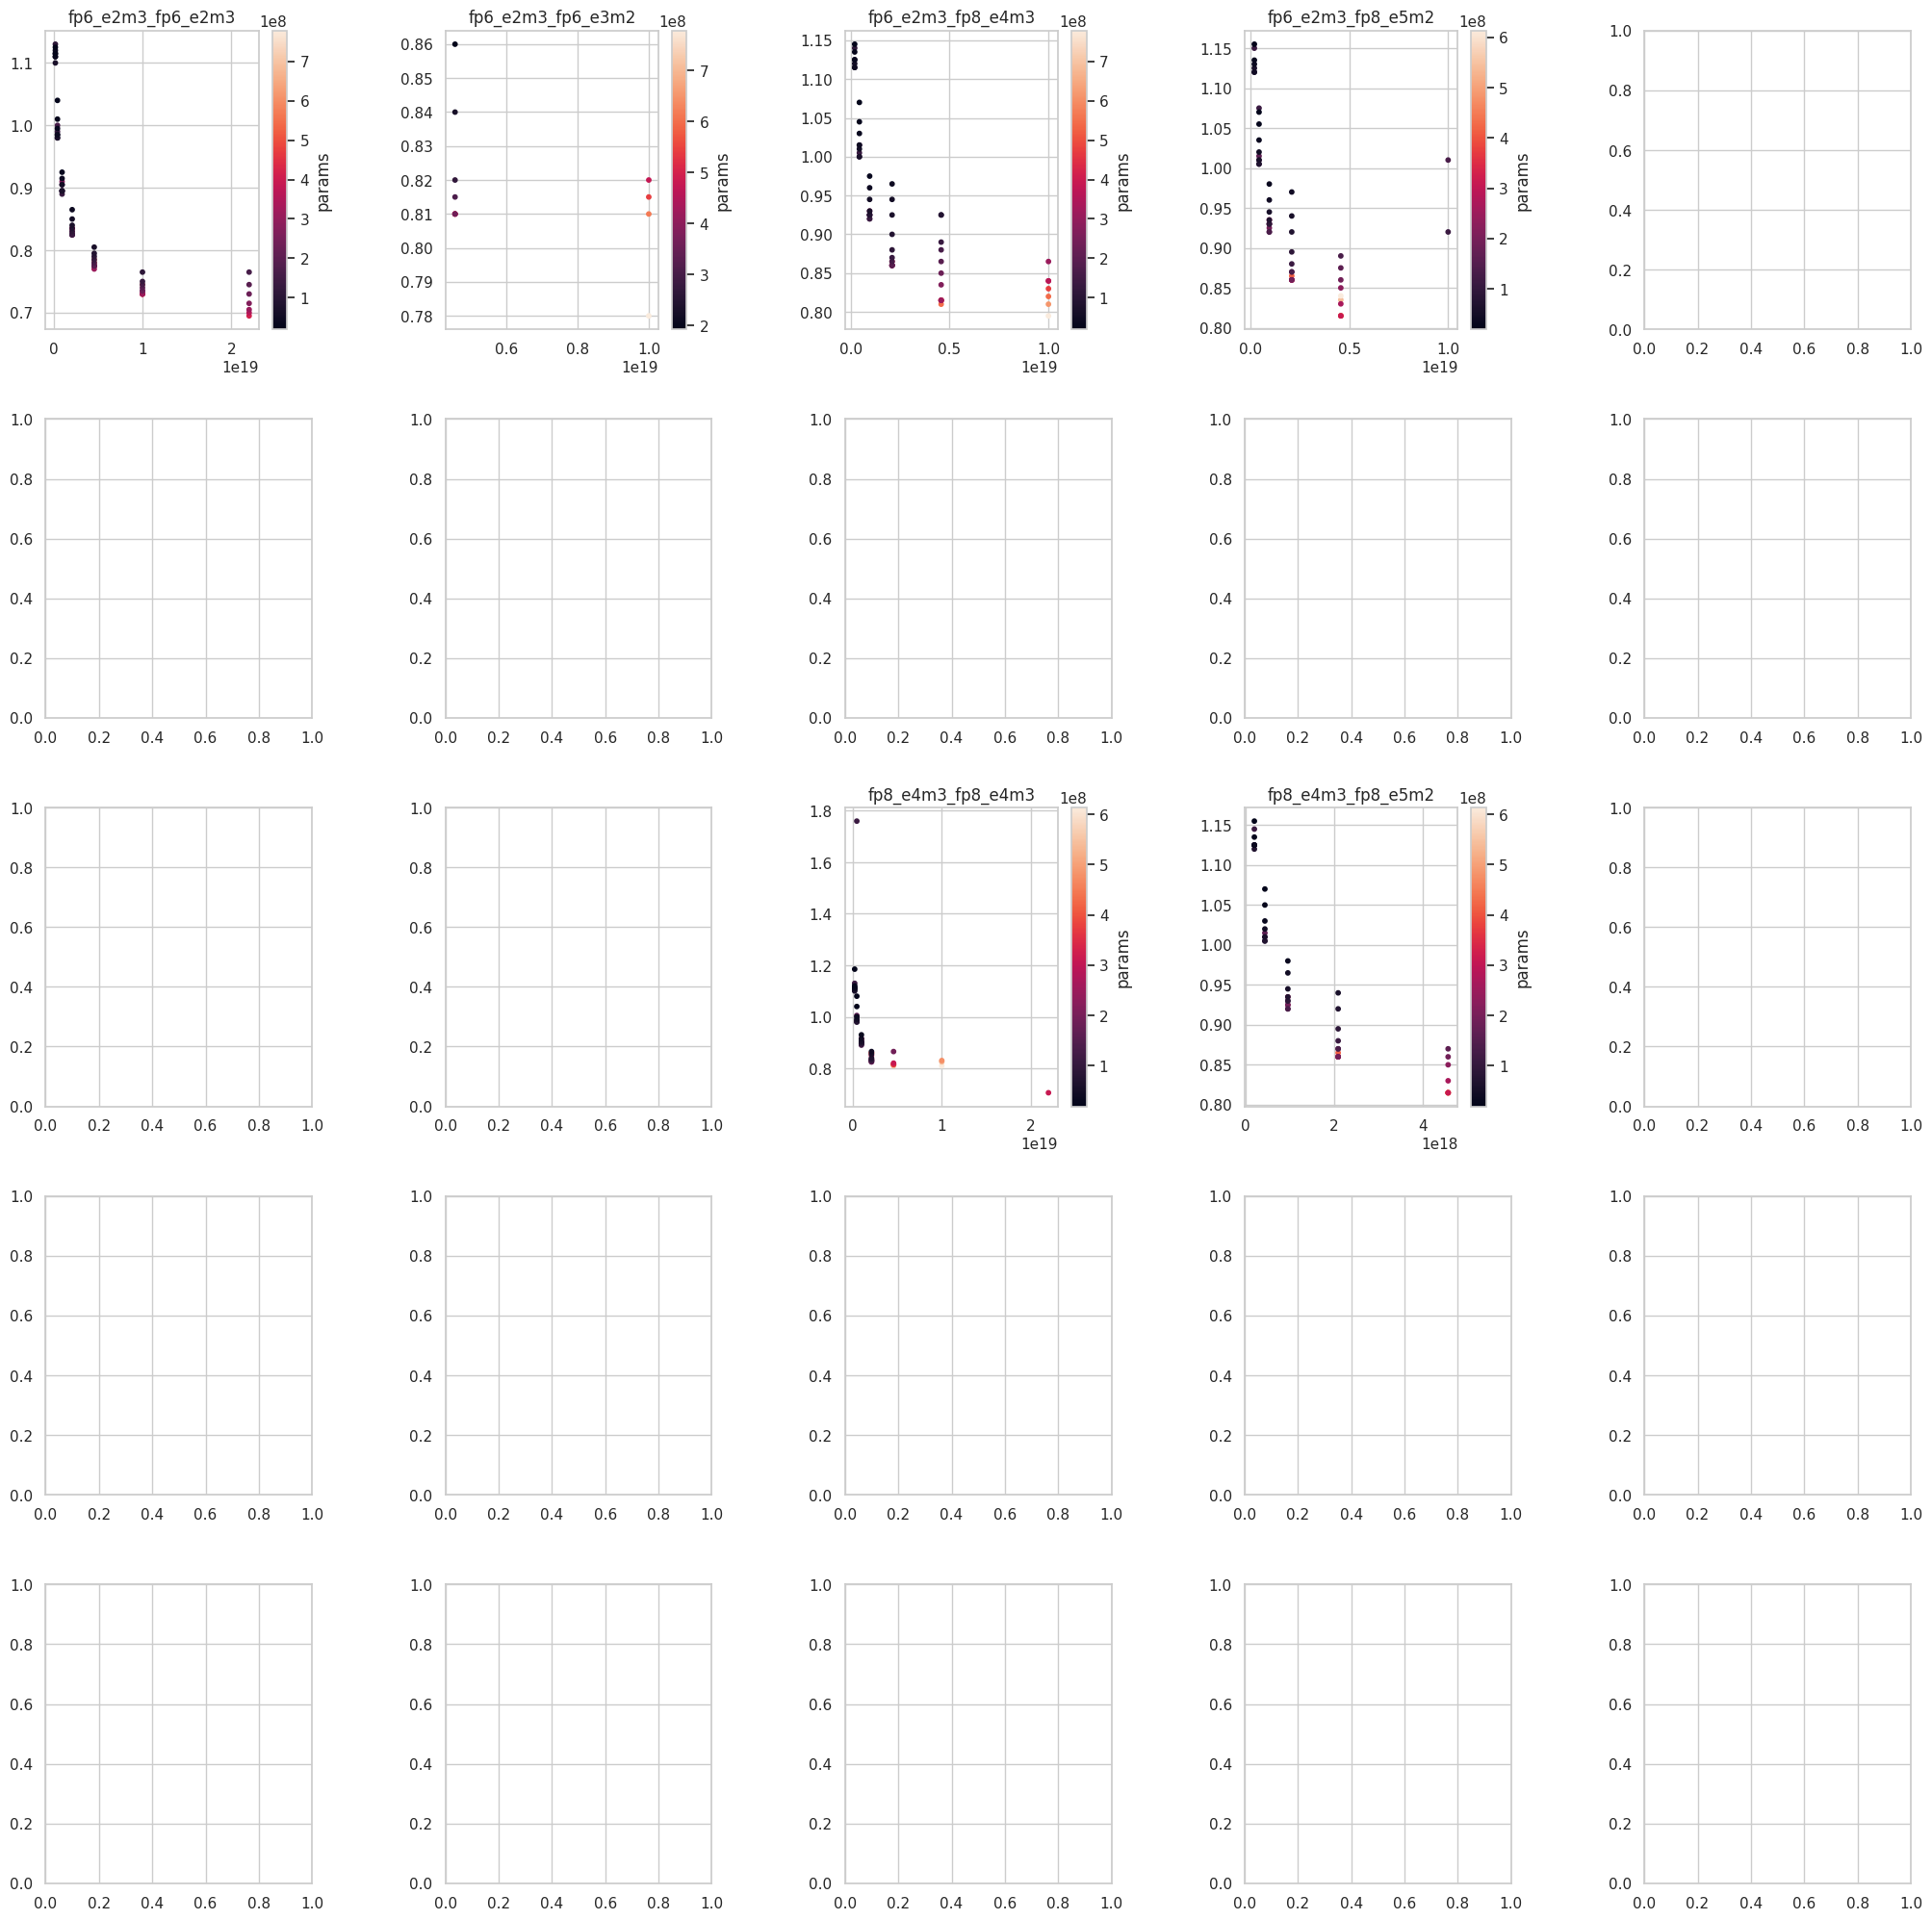

In [20]:
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(5, 5, figsize=(25, 25))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for j, a_format in enumerate(formats):
            
            for loss_name in ["min_val_loss"]:
                ax = axs[i * len(formats) + j]
                print(f"w_format = {w_format}, {a_format}")

                try: 
                    drop_df = pd.read_csv(f"data/{w_format}_{a_format}.csv")             
                    N, D, L = get_data(drop_df, loss_name)
                    
                    F = 6 * np.array(N, dtype=np.float64) * np.array(D, dtype=np.float64)

                    

                    df = pd.DataFrame({'F': F, 'L': L, 'N': N, 'D': D})
                    # df_unique = df.loc[df.groupby('F')['L'].idxmin()]
                    print('F', df['F'], df['N'])
                    # ax.scatter(df['F'], df['L'], color=df['N'], s=10, label='Min L per F')
                    scatter = ax.scatter(df['F'], df['L'], c=df['N'], s=10, label='Min L per F')
                    cbar = plt.colorbar(scatter)
                    cbar.set_label('params')
                    

                    # params, _ = fit(N, D, L, kaplan=kaplan)
                    # print(f"Loss: {params['loss']}")
                
                    # extrapolation = None
                    # masks = np.ones(5)
                    # vals = np.zeros(5)
                    # plot_contours_params(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                
                    ax.set_title(f"{w_format}_{a_format}")

                    params["kaplan"] = kaplan
                    params["w_format"] = w_format
                    params["a_format"] = a_format
                
                    params = pd.DataFrame([params.values], columns=params.index, index = [i])
                    plot_params_df = pd.concat([plot_params_df, params])
                
                except: pass

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()

In [ ]:
# latex tabel of params
for kaplan in [True, False]:
    for i, data in enumerate(val_map.keys()):
        a, b, e, alpha, beta = plot_params_df[(plot_params_df["data"] == data) & (plot_params_df["kaplan"] == kaplan)].values[0][:5]
        print(f"{display_dict[data]} & {a:.2e} & {b:.2e} & {e:.2f} & {alpha:.2f} & {beta:.2f} & {beta / (alpha + beta):.2f} \\\\")
    print()

In [ ]:
formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16", "fp32"]
formats = ["fp6_e2m3", "fp6_e3m2", "fp8_e4m3", "fp8_e5m2", "bfloat16", "fp32"]
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(5, 5, figsize=(25, 25))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, w_format in enumerate(formats):
        for i, a_format in enumerate(formats):
    # for i, data in enumerate(val_map.keys()):
            
            for loss_name in ["val_loss"]:
                ax = axs[i]
                print(f"w_format = {w_format}")

                # drop_df = df[df["data"] == data]
                try: 
                    drop_df = pd.read_csv(f"data/{w_format}_{a_format}.csv")
                    # drop_df = df[(df["model.w_mx_format"] == w_format) & (df["model.a_mx_format"] == a_format)]
                
                    N, D, L = get_data(drop_df, loss_name)

                    params, _ = fit(N, D, L, kaplan=kaplan)
                    print(f"Loss: {params['loss']}")

                # df_big_data = df_big[(df_big["model.w_mx_format"] == w_format) & (df_big["model.a_mx_format"] == a_format)]
                # x = np.array(df_big_data["iso_flop"])
                # y = np.array(df_big_data["params"])
                # z = np.array(df_big_data["val_loss"])
                # extrapolation = (x,y,z)
                    extrapolation = None
                    masks = np.ones(5)
                    vals = np.zeros(5)
                    plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
                # ax.set_title(f"{display_dict[data]}")
                    ax.set_title(f"{w_format}_{a_format}")

                    params["kaplan"] = kaplan
                    params["w_format"] = w_format
                    params["a_format"] = a_format
                # params["loss_name"] = val_map[data]
                    params = pd.DataFrame([params.values], columns=params.index, index = [i])
                    plot_params_df = pd.concat([plot_params_df, params])
                
                except: pass

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()